In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv("finaldata_4weeks.csv")

for x in df:
    print(x)

Unnamed: 0
Country Name
total_cases
total_deaths
continent
population
Year
Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]
Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]
Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]
Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]
Labor force, total [SL.TLF.TOTL.IN]
Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]
Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]
Net migration [SM.POP.NETM]
People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]
People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]
Rural population (% of total population) [SP.RUR.TOTL.ZS]
School enrollment, primary (% gross) [SE.PRM.ENRR]
School enrollment, secondary (% gross) [SE.SEC.ENRR]
School enrollment, terti

In [3]:
del df["Unnamed: 0"]
del df["2week"]
del df["3week"]
del df["4week"]
del df["5week"]
del df["6week"]
del df["Time Code"]
del df["Year"]

df

,Country Name,total_cases,total_deaths,continent,population,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",...,"Domestic private health expenditure per capita, PPP (current international $) [SH.XPD.PVTD.PP.CD]",Population density (people per sq. km of land area) [EN.POP.DNST],Land area (sq. km) [AG.LND.TOTL.K2],Urban land area (sq. km) [AG.LND.TOTL.UR.K2],Population in largest city [EN.URB.LCTY],"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD]
0,Australia,80,3,Oceania,25499881,99.7,5002.358277,4529.887082,5.7,82.497561,...,1497.205078,3.249129,7692020.0,36745.70313,4792281,24.030353,53.485088,41489.476763,6.649538,105.58
1,Australia,100,3,Oceania,25499881,99.7,5002.358277,4529.887082,5.7,82.497561,...,1497.205078,3.249129,7692020.0,36745.70313,4792281,24.030353,53.485088,41489.476763,6.649538,105.58
2,Australia,112,3,Oceania,25499881,99.7,5002.358277,4529.887082,5.7,82.497561,...,1497.205078,3.249129,7692020.0,36745.70313,4792281,24.030353,53.485088,41489.476763,6.649538,105.58
3,Australia,126,3,Oceania,25499881,99.7,5002.358277,4529.887082,5.7,82.497561,...,1497.205078,3.249129,7692020.0,36745.70313,4792281,24.030353,53.485088,41489.476763,6.649538,105.58
4,Australia,156,3,Oceania,25499881,99.7,5002.358277,4529.887082,5.7,82.497561,...,1497.205078,3.249129,7692020.0,36745.70313,4792281,24.030353,53.485088,41489.476763,6.649538,105.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,United States,55231,801,North America,331002647,99.1,9869.742382,9869.742382,10.3,78.539024,...,5106.866211,35.766089,9147420.0,802053.59230,18819361,24.139976,52.710677,51484.941243,5.968367,122.32
556,United States,69194,1050,North America,331002647,99.1,9869.742382,9869.742382,10.3,78.539024,...,5106.866211,35.766089,9147420.0,802053.59230,18819361,24.139976,52.710677,51484.941243,5.968367,122.32
557,United States,85991,1296,North America,331002647,99.1,9869.742382,9869.742382,10.3,78.539024,...,5106.866211,35.766089,9147420.0,802053.59230,18819361,24.139976,52.710677,51484.941243,5.968367,122.32
558,United States,104686,1707,North America,331002647,99.1,9869.742382,9869.742382,10.3,78.539024,...,5106.866211,35.766089,9147420.0,802053.59230,18819361,24.139976,52.710677,51484.941243,5.968367,122.32


One last check for missing values since I filled them with continent's median there may be missing features for whole continent i will fill them with general median.

In [4]:
df.isnull().any()

Country Name                                                                                                             False
total_cases                                                                                                              False
total_deaths                                                                                                             False
continent                                                                                                                False
population                                                                                                               False
Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]                                                    False
Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]                                                  False
Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]                       

I will check it manually because eventhough there was no median for a continent, I filled the missing value with zero. I can simply search for zero values but sum zero values are the true values so I will note the features that have missing value.

In [5]:
missing =["Rural population (% of total population) [SP.RUR.TOTL.ZS]"]

We only have one missing value.

In [6]:
for index in range(len(df)):
    if (df.loc[index,missing] == 0).bool():
        df.loc[index,missing] = np.median(df[missing])

In [7]:
(df[missing] == 0).any()

Rural population (% of total population) [SP.RUR.TOTL.ZS]    False
dtype: bool

In [32]:
df.to_csv("data.csv")

As I filled all my data now truly, I want to inspect my data week by week.

In [8]:
fd=pd.DataFrame(columns=df.columns)
for i in range(6,560,7): 
    fd.loc[i,:] = df.loc[i,:]
    
fd.reset_index(inplace=True,drop=True)
fd

,Country Name,total_cases,total_deaths,continent,population,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",...,"Domestic private health expenditure per capita, PPP (current international $) [SH.XPD.PVTD.PP.CD]",Population density (people per sq. km of land area) [EN.POP.DNST],Land area (sq. km) [AG.LND.TOTL.K2],Urban land area (sq. km) [AG.LND.TOTL.UR.K2],Population in largest city [EN.URB.LCTY],"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD]
0,Australia,249,3,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,1497.21,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58
1,Australia,1098,7,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,1497.21,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58
2,Australia,3809,14,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,1497.21,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58
3,Australia,5687,34,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,1497.21,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58
4,Austria,504,1,Europe,9006400,98.4,4688.28,5295.18,8.9,81.6415,...,1550.82,107.207,82523,8568.16,1900547,28.4879,49.9239,38748,7.47898,101.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,United Kingdom,25150,1789,Europe,67886004,99.4,3958.02,4177.82,3.6,81.1561,...,892.76,274.827,241930,58698.8,9046485,28.7768,56.4307,34170.6,7.01546,103.82
76,United States,433,17,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,5106.87,35.7661,9.14742e+06,802054,18819361,24.14,52.7107,51484.9,5.96837,122.32
77,United States,2951,57,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,5106.87,35.7661,9.14742e+06,802054,18819361,24.14,52.7107,51484.9,5.96837,122.32
78,United States,26747,340,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,5106.87,35.7661,9.14742e+06,802054,18819361,24.14,52.7107,51484.9,5.96837,122.32


Since we have some features for "per capita" I will create a new feature which is total_cases/population. It will me more appropriate to comment the relation between new feature and "per capita" features.

In [9]:
fd["cases/pop"] = df["total_cases"] / df["population"] *10000000
fd

,Country Name,total_cases,total_deaths,continent,population,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",...,Population density (people per sq. km of land area) [EN.POP.DNST],Land area (sq. km) [AG.LND.TOTL.K2],Urban land area (sq. km) [AG.LND.TOTL.UR.K2],Population in largest city [EN.URB.LCTY],"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],cases/pop
0,Australia,249,3,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58,31.372695
1,Australia,1098,7,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58,39.215869
2,Australia,3809,14,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58,43.921774
3,Australia,5687,34,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,3.24913,7.69202e+06,36745.7,4792281,24.0304,53.4851,41489.5,6.64954,105.58,49.411995
4,Austria,504,1,Europe,9006400,98.4,4688.28,5295.18,8.9,81.6415,...,107.207,82523,8568.16,1900547,28.4879,49.9239,38748,7.47898,101.29,61.176756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,United Kingdom,25150,1789,Europe,67886004,99.4,3958.02,4177.82,3.6,81.1561,...,274.827,241930,58698.8,9046485,28.7768,56.4307,34170.6,7.01546,103.82,2779.764490
76,United States,433,17,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,35.7661,9.14742e+06,802054,18819361,24.14,52.7107,51484.9,5.96837,122.32,2938.440264
77,United States,2951,57,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,35.7661,9.14742e+06,802054,18819361,24.14,52.7107,51484.9,5.96837,122.32,3026.593472
78,United States,26747,340,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,35.7661,9.14742e+06,802054,18819361,24.14,52.7107,51484.9,5.96837,122.32,3332.191260


In [10]:
fd["week1"] = False
fd["week2"] = False
fd["week3"] = False
fd["week4"] = False

for i in range(0,80,4):
    for week in range(4):
        column_name = "week" + str(week+1)
        fd.loc[i+week,column_name] = True
        
fd

,Country Name,total_cases,total_deaths,continent,population,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",...,"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],cases/pop,week1,week2,week3,week4
0,Australia,249,3,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,24.0304,53.4851,41489.5,6.64954,105.58,31.372695,True,False,False,False
1,Australia,1098,7,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,24.0304,53.4851,41489.5,6.64954,105.58,39.215869,False,True,False,False
2,Australia,3809,14,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,24.0304,53.4851,41489.5,6.64954,105.58,43.921774,False,False,True,False
3,Australia,5687,34,Oceania,25499881,99.7,5002.36,4529.89,5.7,82.4976,...,24.0304,53.4851,41489.5,6.64954,105.58,49.411995,False,False,False,True
4,Austria,504,1,Europe,9006400,98.4,4688.28,5295.18,8.9,81.6415,...,28.4879,49.9239,38748,7.47898,101.29,61.176756,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,United Kingdom,25150,1789,Europe,67886004,99.4,3958.02,4177.82,3.6,81.1561,...,28.7768,56.4307,34170.6,7.01546,103.82,2779.764490,False,False,False,True
76,United States,433,17,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,24.14,52.7107,51484.9,5.96837,122.32,2938.440264,True,False,False,False
77,United States,2951,57,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,24.14,52.7107,51484.9,5.96837,122.32,3026.593472,False,True,False,False
78,United States,26747,340,North America,331002647,99.1,9869.74,9869.74,10.3,78.539,...,24.14,52.7107,51484.9,5.96837,122.32,3332.191260,False,False,True,False


I will winsorize for outliners.

In [11]:
fd_wins= fd
for i in range(4,42):
    fd_wins[fd.columns[i]] = winsorize(fd.iloc[:,i].astype(float),(0.10,0.10))
    
fd_wins

,Country Name,total_cases,total_deaths,continent,population,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",...,"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],cases/pop,week1,week2,week3,week4
0,Australia,249,3,Oceania,25499881.0,99.7,5002.358277,4529.887082,5.7,82.497561,...,24.030353,53.485088,41489.476763,6.649538,105.58,113.252798,True,False,False,False
1,Australia,1098,7,Oceania,25499881.0,99.7,5002.358277,4529.887082,5.7,82.497561,...,24.030353,53.485088,41489.476763,6.649538,105.58,113.252798,False,True,False,False
2,Australia,3809,14,Oceania,25499881.0,99.7,5002.358277,4529.887082,5.7,82.497561,...,24.030353,53.485088,41489.476763,6.649538,105.58,113.252798,False,False,True,False
3,Australia,5687,34,Oceania,25499881.0,99.7,5002.358277,4529.887082,5.7,82.497561,...,24.030353,53.485088,41489.476763,6.649538,105.58,113.252798,False,False,False,True
4,Austria,504,1,Europe,9006400.0,98.4,4688.280204,5295.181772,8.9,81.641463,...,28.487892,49.923940,38747.991332,7.478983,101.29,113.252798,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,United Kingdom,25150,1789,Europe,67886004.0,99.4,3958.018894,4177.815131,4.2,81.156098,...,28.776791,56.430746,34170.562514,7.015464,103.82,2779.764490,False,False,False,True
76,United States,433,17,North America,126476458.0,99.1,7477.897607,6203.454703,10.3,78.539024,...,24.139976,52.710677,51484.941243,5.968367,122.32,2938.440264,True,False,False,False
77,United States,2951,57,North America,126476458.0,99.1,7477.897607,6203.454703,10.3,78.539024,...,24.139976,52.710677,51484.941243,5.968367,122.32,3026.593472,False,True,False,False
78,United States,26747,340,North America,126476458.0,99.1,7477.897607,6203.454703,10.3,78.539024,...,24.139976,52.710677,51484.941243,5.968367,122.32,3332.191260,False,False,True,False


In [12]:
log_fd_wins = fd_wins
for i in range(4,42):
    log_fd_wins[fd.columns[i]] = np.log(fd_wins.iloc[:,i].astype(float))

In [13]:
log_fd_wins_week_1 = log_fd_wins[log_fd_wins.week1]

log_fd_wins_week_1

,Country Name,total_cases,total_deaths,continent,population,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",...,"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],cases/pop,week1,week2,week3,week4
0,Australia,249,3,Oceania,17.054184,4.602166,8.517665,8.418452,1.740466,4.412769,...,3.179318,3.979403,10.633195,1.894547,4.659469,4.729622,True,False,False,False
4,Austria,504,1,Europe,16.013446,4.589041,8.452821,8.574553,2.186051,4.402337,...,3.349479,3.910501,10.564834,2.012097,4.617988,4.729622,True,False,False,False
8,Bahrain,214,0,Asia,15.572023,4.602166,7.002486,7.531712,2.332144,4.344221,...,2.710201,3.699950,9.916604,2.235951,4.877485,4.990837,True,False,False,False
12,Belgium,399,3,Europe,16.265620,4.599152,8.330715,8.448461,1.667707,4.399855,...,3.377113,4.023036,10.485811,2.193387,4.528181,5.836992,True,False,False,False
16,China,882,26,Asia,18.655567,4.604170,7.002486,7.531712,1.435085,4.344221,...,2.730325,3.699950,9.666515,1.843714,4.877485,6.856673,True,False,False,False
20,Denmark,875,1,Europe,15.572023,4.589041,8.624359,8.535618,1.722767,4.394509,...,3.436869,4.041558,10.784507,2.493996,4.637928,7.309033,True,False,False,False
24,France,613,9,Europe,17.994097,4.589041,8.357813,8.472674,1.902108,4.413094,...,3.475354,4.101903,10.394266,2.241818,4.565077,7.576293,True,False,False,False
28,Germany,684,0,Europe,18.243752,4.592085,8.458347,8.605814,2.186051,4.394329,...,3.498343,3.989777,10.539839,2.047496,4.681390,4.729622,True,False,False,False
32,Greece,331,4,Europe,16.159531,4.599152,7.320306,7.723632,1.791759,4.399225,...,3.517272,4.017916,9.666515,2.493996,4.554929,5.609981,True,False,False,False
36,Italy,1128,29,Europe,17.917523,4.604170,7.915241,8.139530,1.774952,4.421775,...,3.517272,4.033311,10.186309,2.300768,4.528181,6.861582,True,False,False,False


4


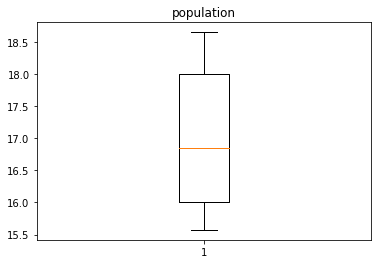

5


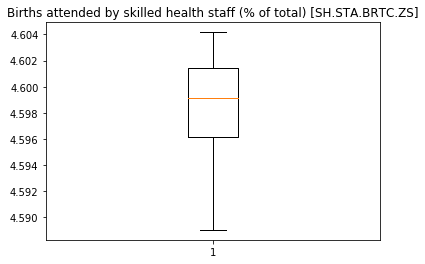

6


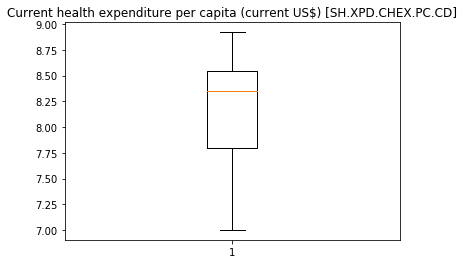

7


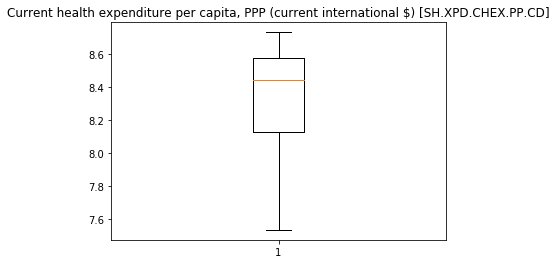

8


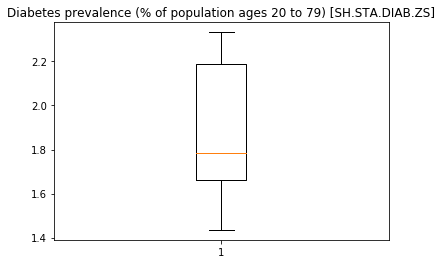

9


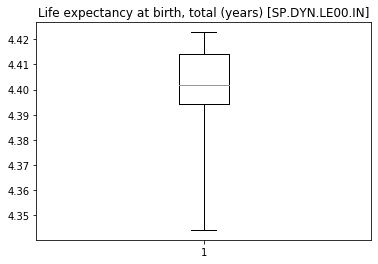

10


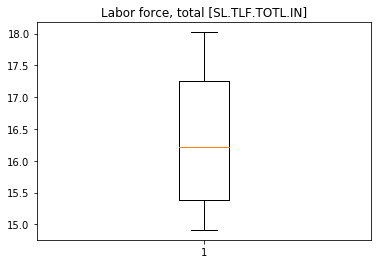

11


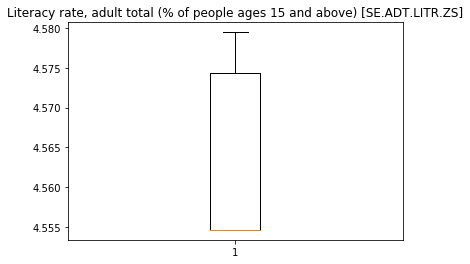

12


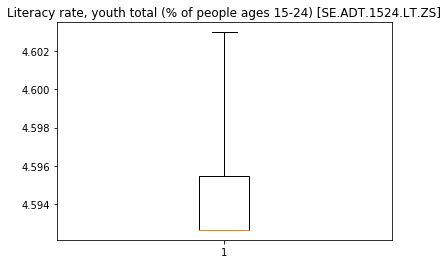

13


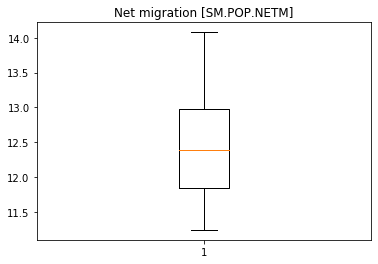

14


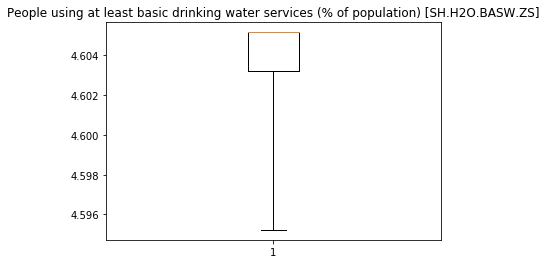

15


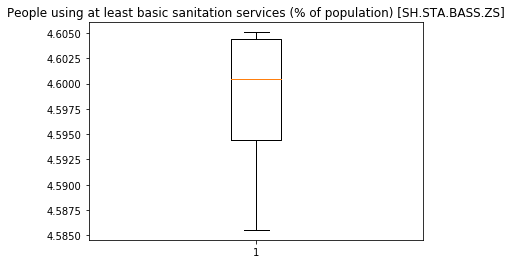

16


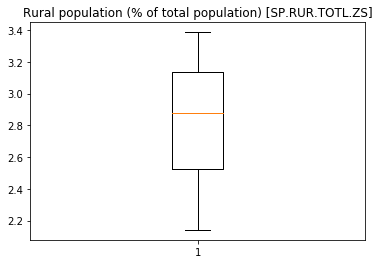

17


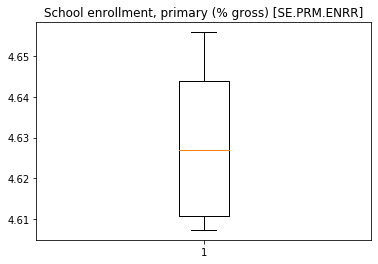

18


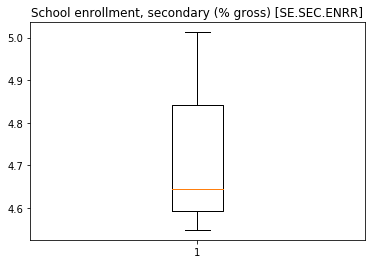

19


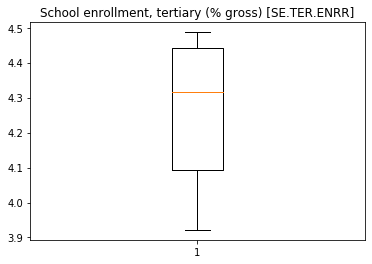

20


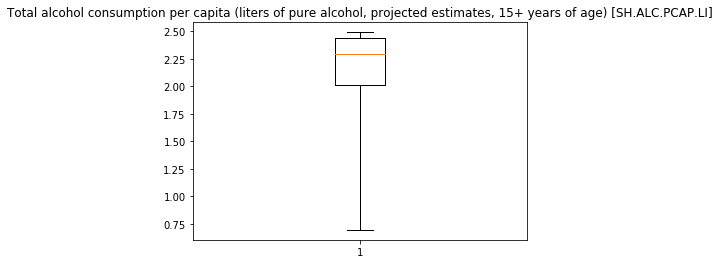

21


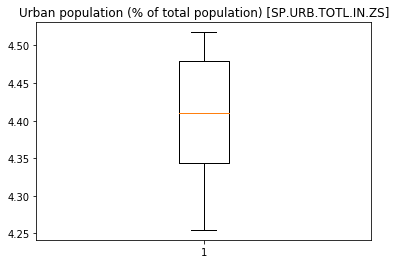

22


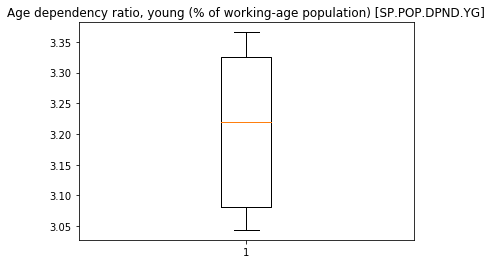

23


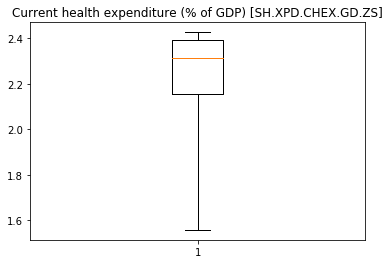

24


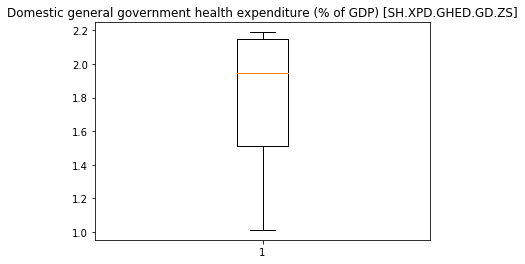

25


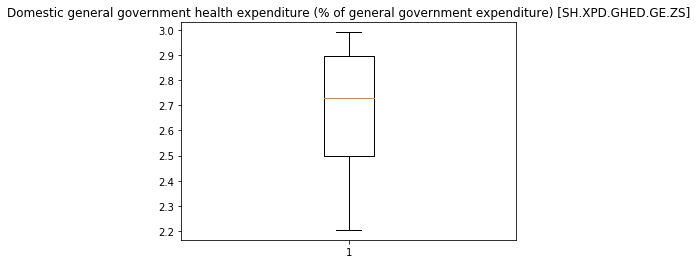

26


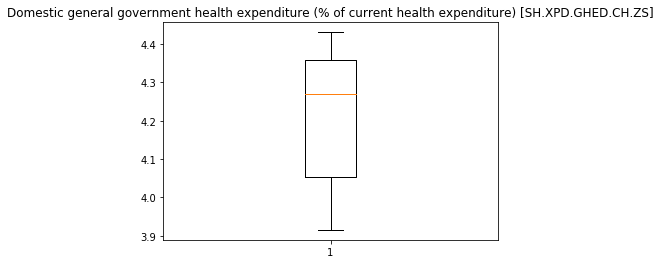

27


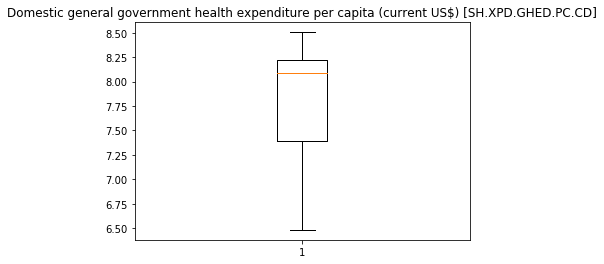

28


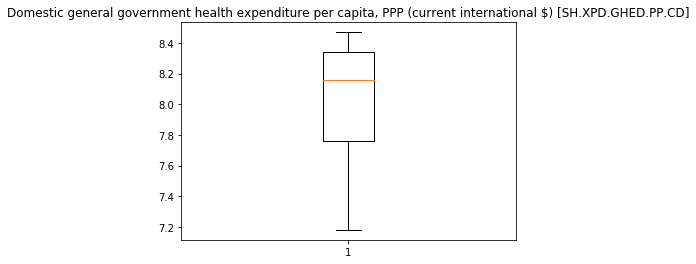

29


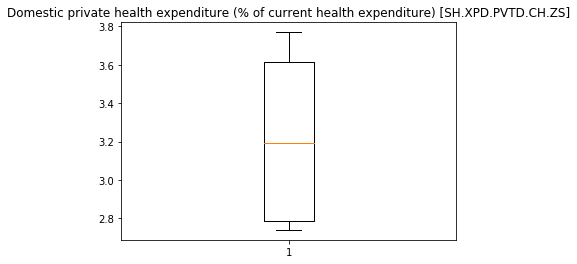

30


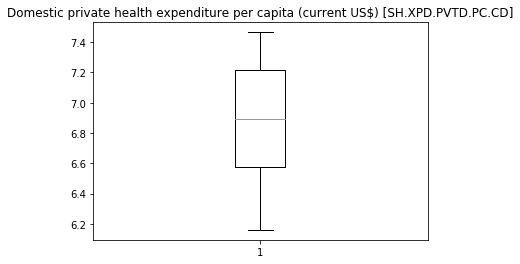

31


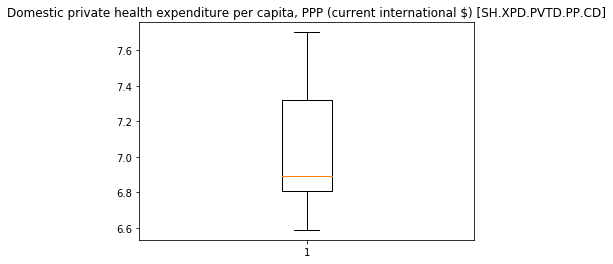

32


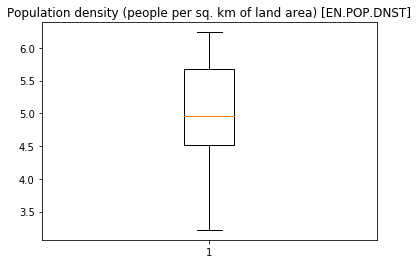

33


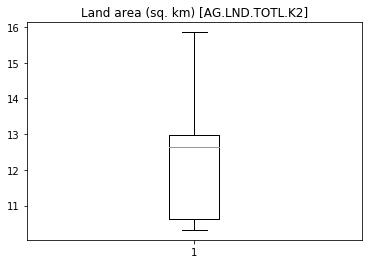

34


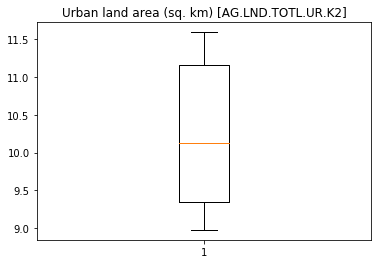

35


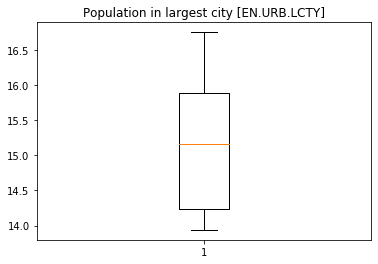

36


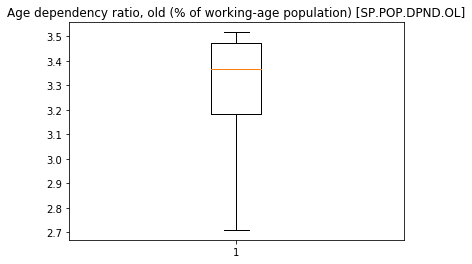

37


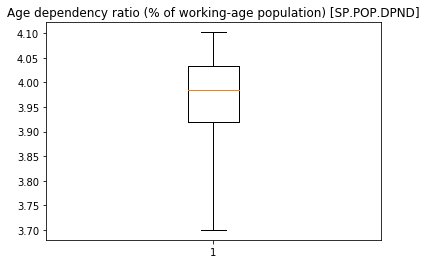

38


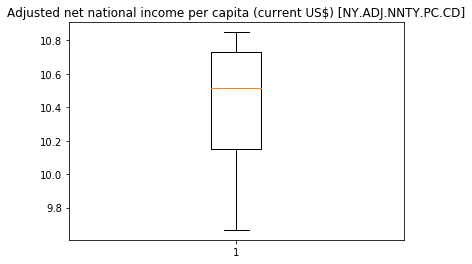

39


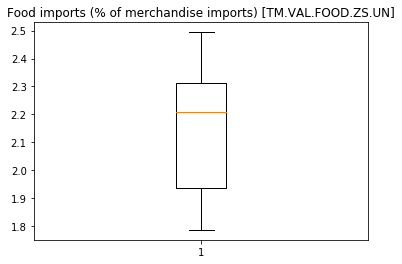

40


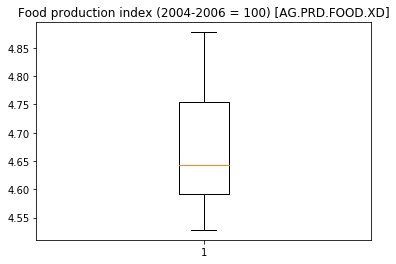

41


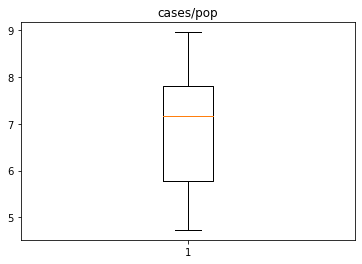

In [14]:
for i in range(4,42):
    plt.boxplot(log_fd_wins_week_1.iloc[:,i],whis=5)
    plt.title(log_fd_wins_week_1.columns[i])
    print(i)
    plt.show()

Now it looks great. I have no significant outliner.

In [59]:
log_fd_wins_week_1.describe()

,population,Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]",Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Labor force, total [SL.TLF.TOTL.IN]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]",Net migration [SM.POP.NETM],...,Population density (people per sq. km of land area) [EN.POP.DNST],Land area (sq. km) [AG.LND.TOTL.K2],Urban land area (sq. km) [AG.LND.TOTL.UR.K2],Population in largest city [EN.URB.LCTY],"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]",Age dependency ratio (% of working-age population) [SP.POP.DPND],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN],Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],cases/pop
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,16.982876,4.598134,8.154010,8.302213,1.879743,4.397061,16.302961,4.561640,4.595171,12.484441,...,4.922229,12.429252,10.239308,15.178112,3.255509,3.951059,10.398926,2.139629,4.673283,6.878815
std,1.157702,0.004877,0.638856,0.410421,0.321532,0.026679,1.145160,0.011095,0.004452,0.954329,...,1.008815,1.816492,1.004090,0.993539,0.294353,0.130305,0.407539,0.246064,0.117469,1.373062
min,15.572023,4.589041,7.002486,7.531712,1.435085,4.344221,14.914181,4.554608,4.592628,11.238462,...,3.218918,10.318243,8.974384,13.939223,2.710201,3.699950,9.666515,1.786473,4.528181,4.729622
25%,16.003485,4.596129,7.801417,8.127003,1.662945,4.394464,15.382139,4.554608,4.592628,11.840569,...,4.509090,10.630005,9.350324,14.238832,3.182731,3.918410,10.152885,1.934725,4.592442,5.780239
50%,16.855405,4.599152,8.354244,8.440312,1.783356,4.401844,16.210573,4.554608,4.592628,12.386307,...,4.963654,12.647128,10.132072,15.167980,3.368341,3.984590,10.512825,2.207049,4.643044,7.178610
75%,18.003908,4.601413,8.544338,8.578838,2.186051,4.414214,17.255252,4.574367,4.595445,12.970986,...,5.674492,12.968370,11.166383,15.883646,3.473845,4.033088,10.728816,2.310818,4.754043,7.801506
max,18.655567,4.604170,8.919707,8.732862,2.332144,4.422800,18.021500,4.579485,4.603004,14.080372,...,6.237265,15.855694,11.596147,16.750397,3.517272,4.101903,10.849045,2.493996,4.877485,8.962449


In [17]:
log_fd_wins_week_1.columns

Index(['Country Name', 'total_cases', 'total_deaths', 'continent',
       'population',
       'Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]',
       'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]',
       'Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Labor force, total [SL.TLF.TOTL.IN]',
       'Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
       'Literacy rate, youth total (% of people ages 15-24) [SE.ADT.1524.LT.ZS]',
       'Net migration [SM.POP.NETM]',
       'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]',
       'People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]',
       'Rural population (% of total population) [SP.RUR.TOTL.Z

In [30]:
per_capita = ['People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]',
             'People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]',
             'Rural population (% of total population) [SP.RUR.TOTL.ZS]',
             'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]',
             'Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]',
             'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
             'Age dependency ratio (% of working-age population) [SP.POP.DPND]',
             'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]',
             'Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD]',
             'Domestic private health expenditure per capita, PPP (current international $) [SH.XPD.PVTD.PP.CD]',
             'Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]',
             'Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]',
             'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]',]

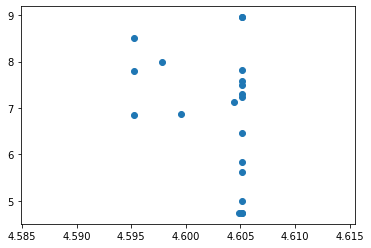

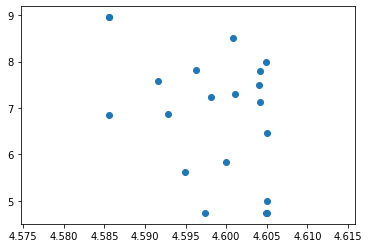

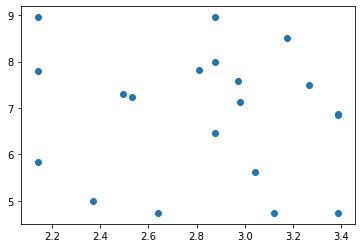

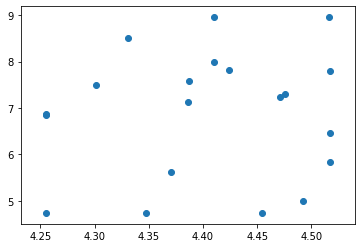

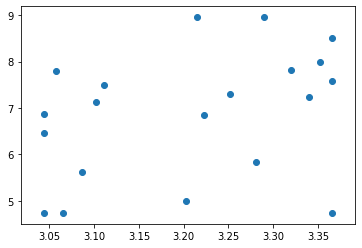

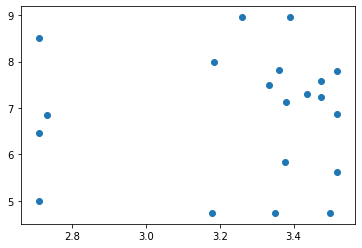

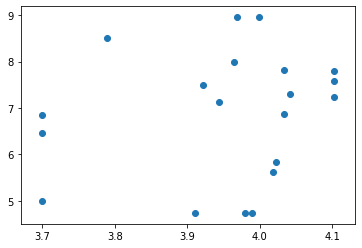

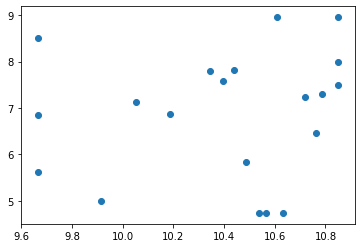

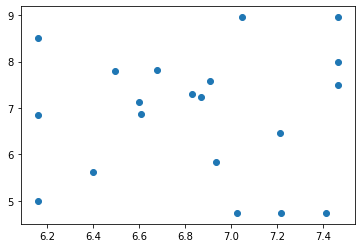

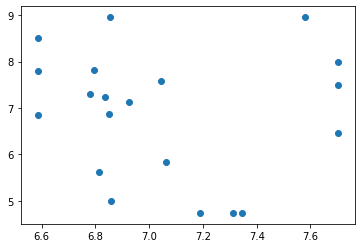

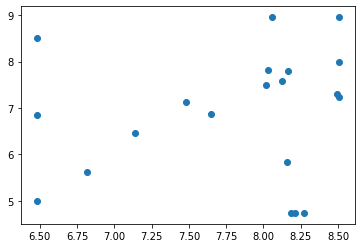

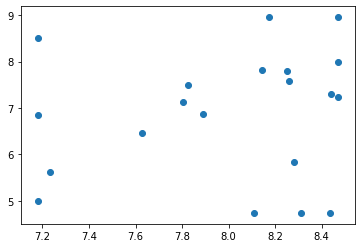

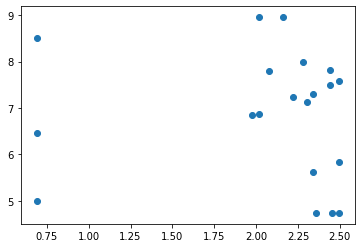

In [33]:
for feature in per_capita:
    plt.scatter(log_fd_wins_week_1[feature],log_fd_wins_week_1["cases/pop"])
    plt.show()

In [53]:
not_per_capita = list()

for y in df.columns:
    for x in per_capita:    
        if y != x:
            not_per_capita.append(str(y))

    
not_per_capita = set(not_per_capita)

not_per_capita

{'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]',
 'Age dependency ratio (% of working-age population) [SP.POP.DPND]',
 'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
 'Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]',
 'Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]',
 'Country Name',
 'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
 'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]',
 'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]',
 'Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS]',
 'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]',
 'Domestic general government health expenditure (% of current health expenditure) [SH.XPD.GHED.CH.ZS]',
 'Domestic general government health expenditure (% of general government expenditure) [SH.XPD.GHED.GE.ZS]',
 'Dome

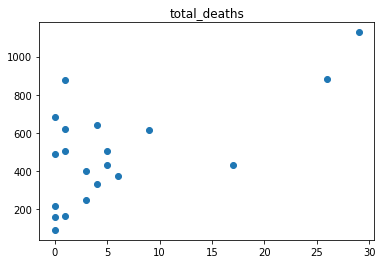

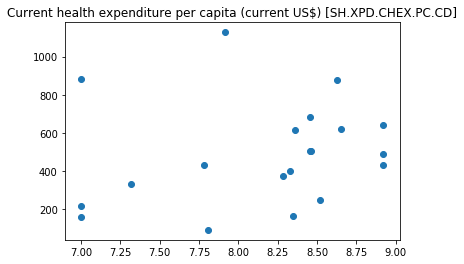

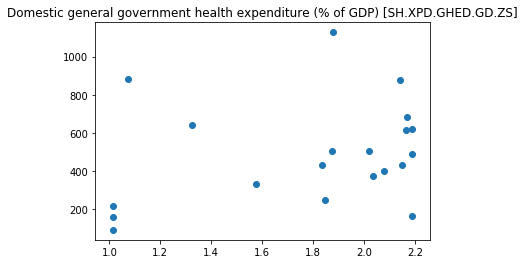

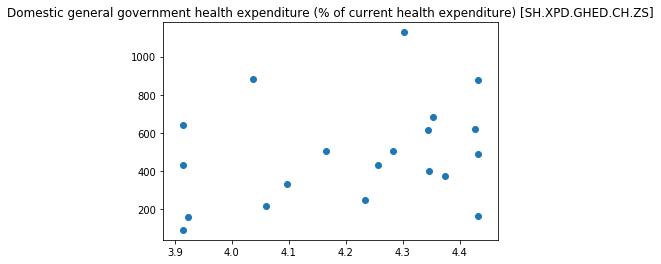

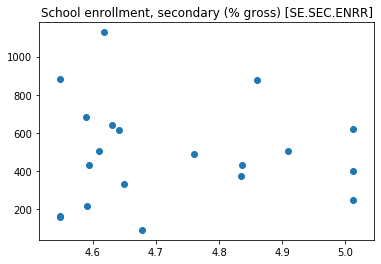

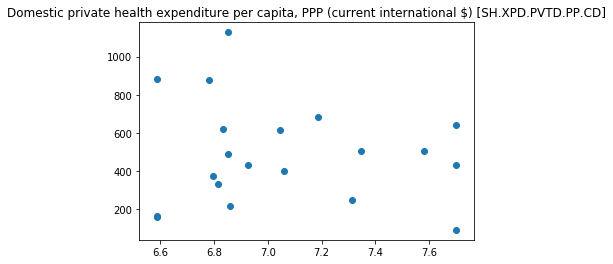

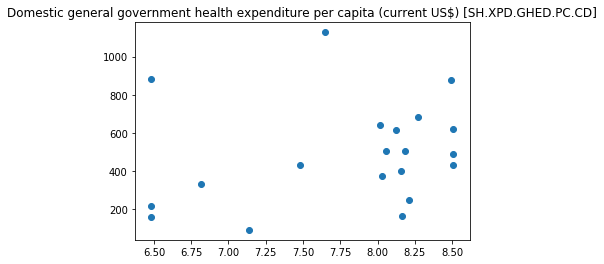

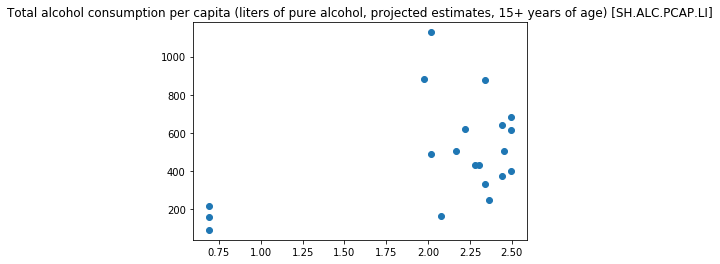

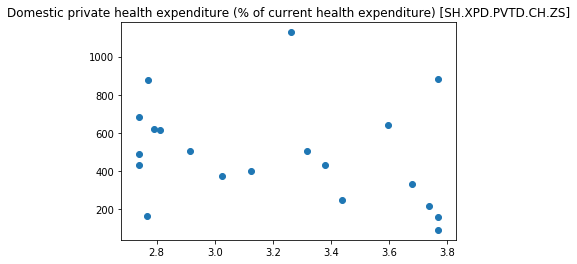

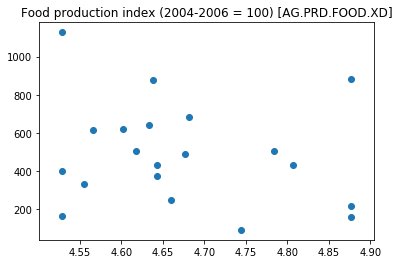

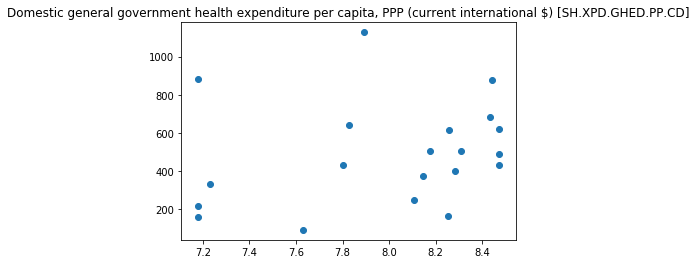

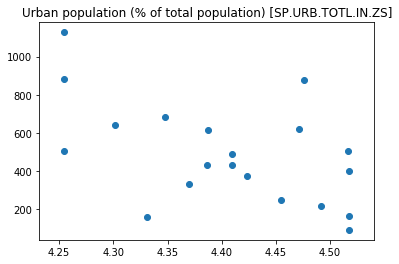

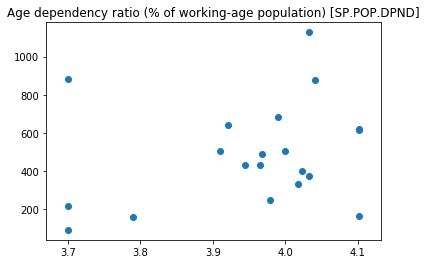

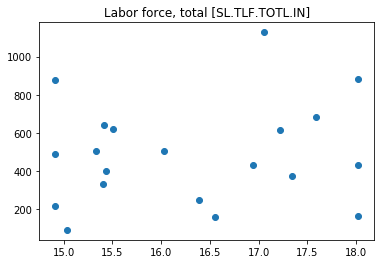

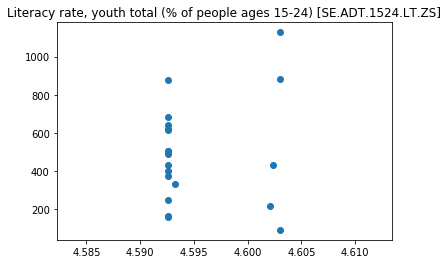

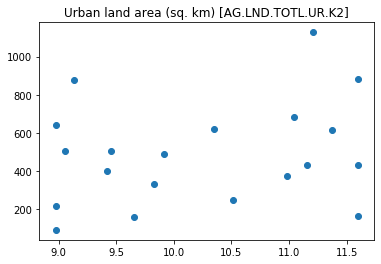

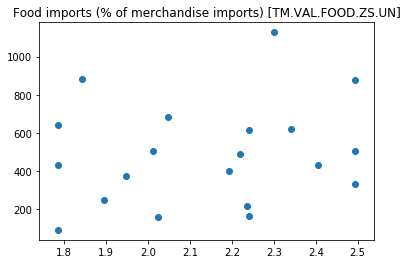

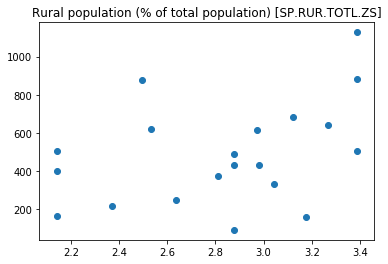

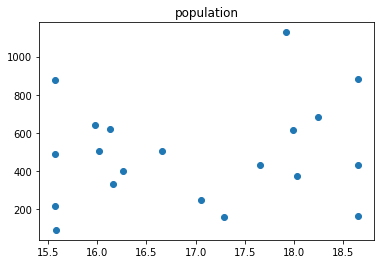

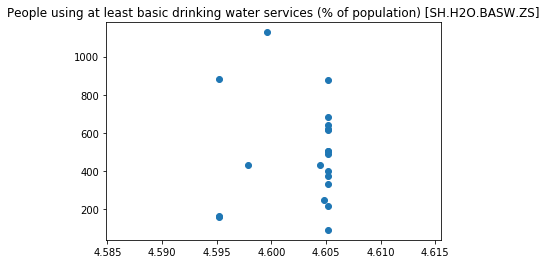

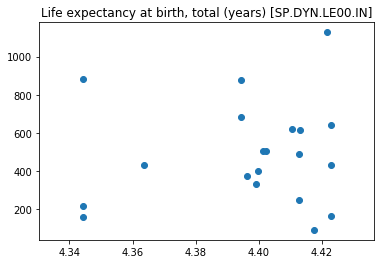

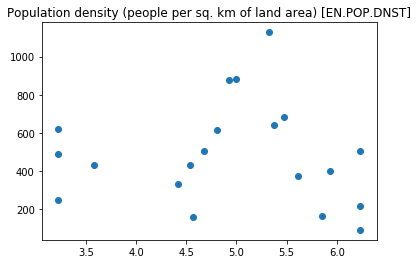

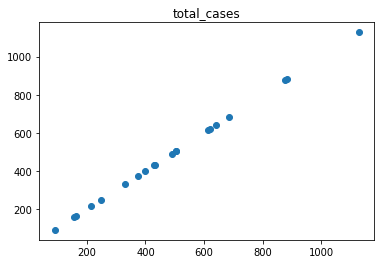

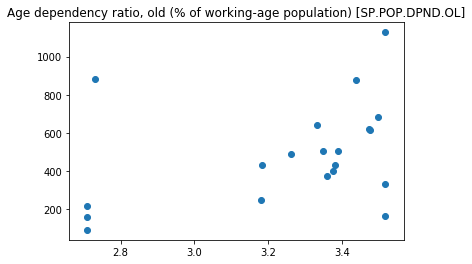

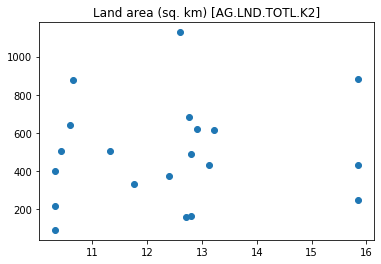

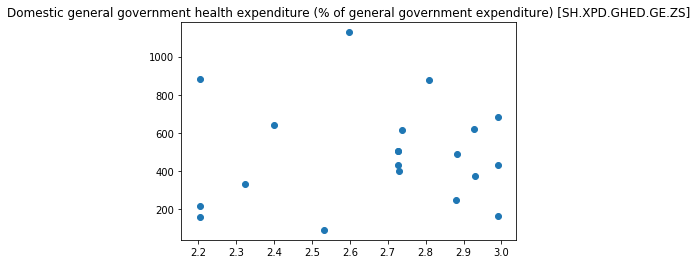

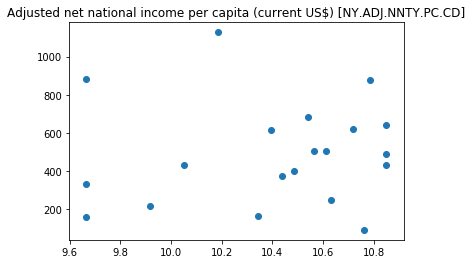

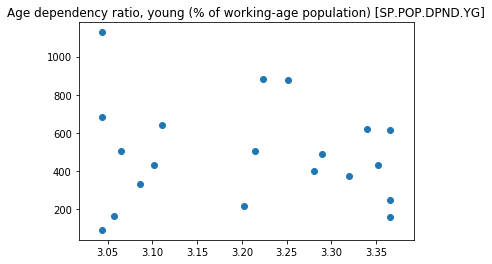

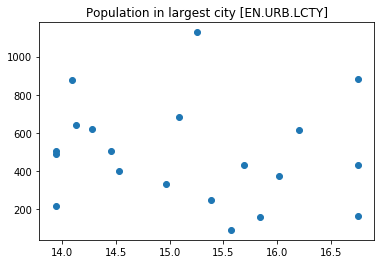

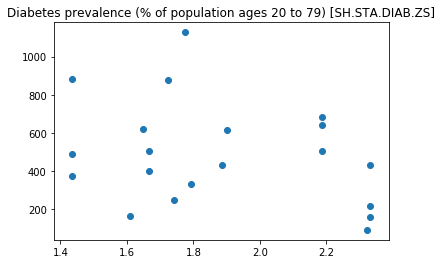

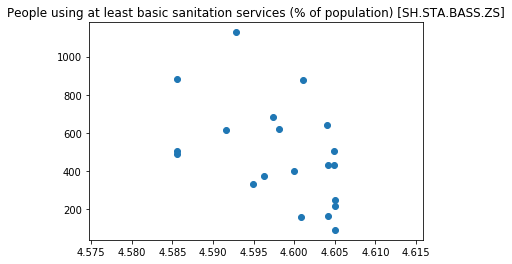

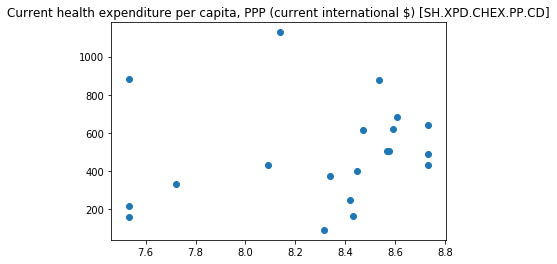

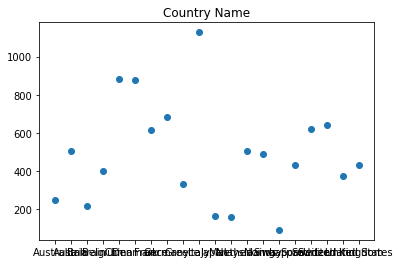

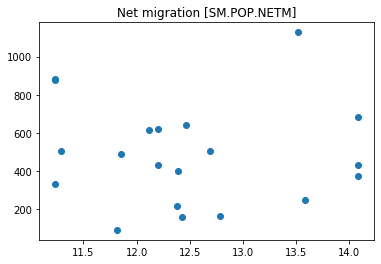

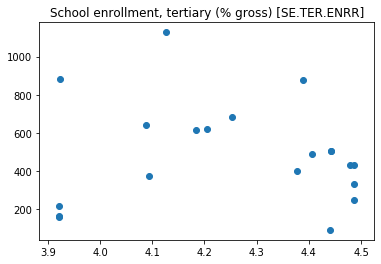

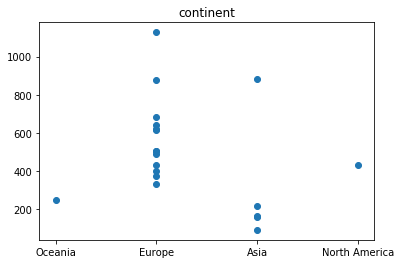

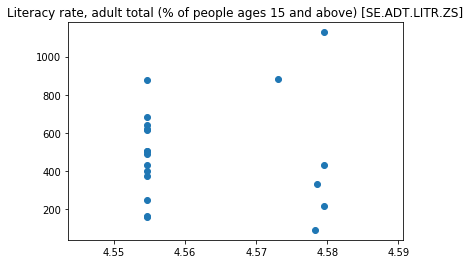

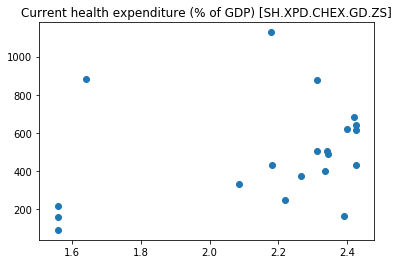

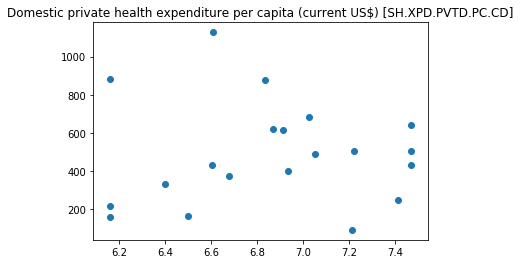

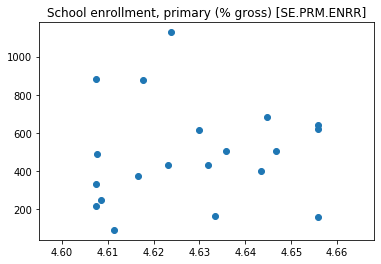

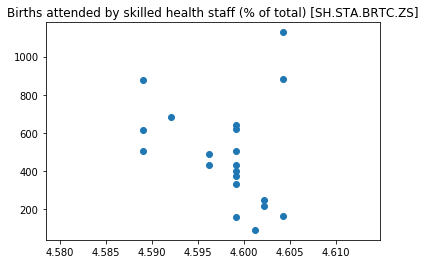

In [57]:
for feature in not_per_capita:
    plt.scatter(log_fd_wins_week_1[feature],log_fd_wins_week_1["total_cases"])
    plt.title(feature)
    plt.show()

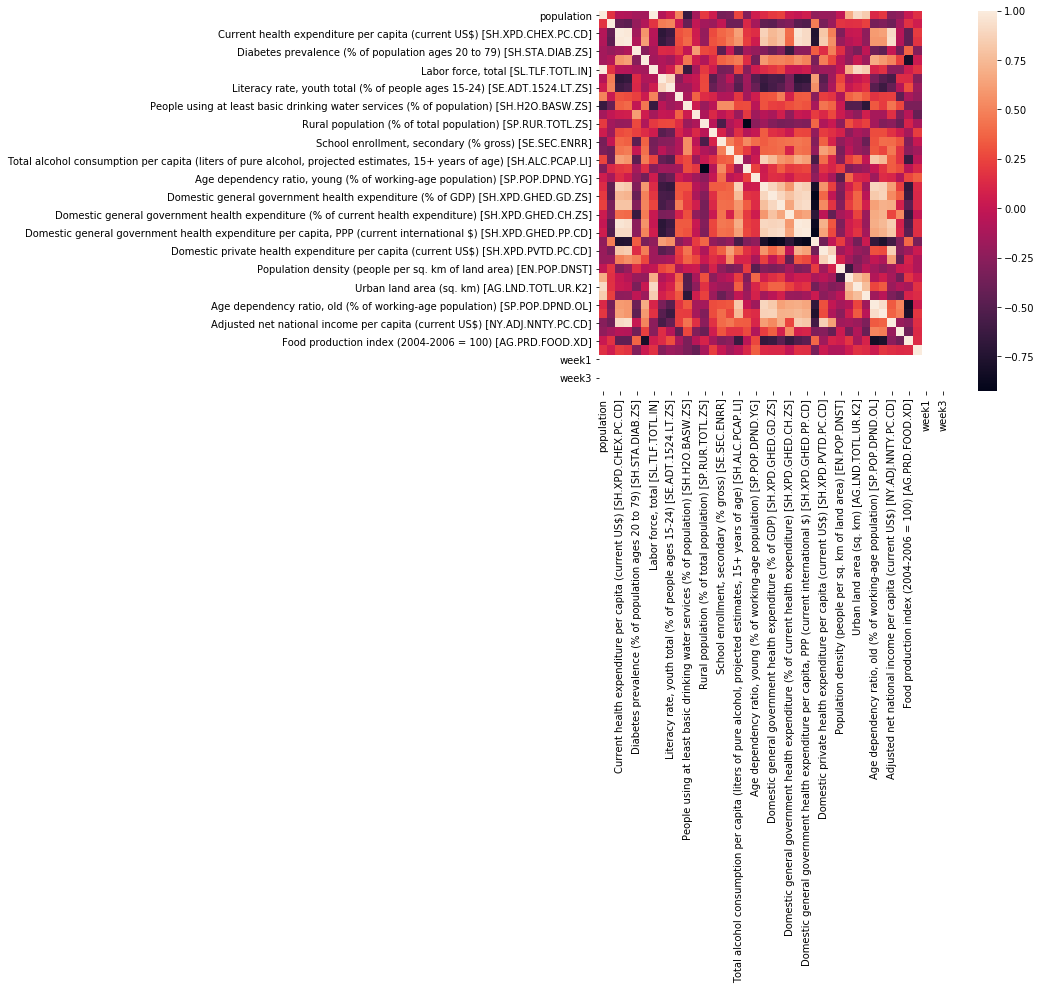

In [16]:
plt.figure(figsize=(8,7))
sns.heatmap(log_fd_wins_week_1.corr())
plt.show()